In [1]:
# Example 7-3: 옷 이미지 분류 
## - CNN
## - Optimizer: SGD
## - Loss function: Cross entropy

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

import wget

In [2]:
##(6.4) Read MINST data
mnist = datasets.fetch_openml("Fashion-MNIST")

In [3]:
##(6.5) normalize data
mnist_data = mnist.data / 255
pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.000000,0.000000,0.521569,0.654902,0.286275,0.00000,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011765,0.000000,0.321569,0.929412,0.905882,0.27451,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0


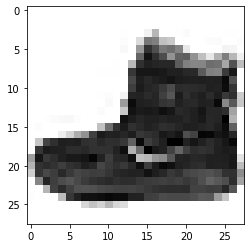

In [4]:
##(6.6) Plotting the first image
plt.imshow(mnist_data[0].reshape(28,28), cmap=cm.gray_r)
plt.show()

In [5]:
##(6.7) Label
mnist_label = mnist.target.astype(np.int8)
mnist_label

array([9, 0, 0, ..., 8, 1, 5], dtype=int8)

In [6]:
##(6.8) train/test data
train_size = 5000
test_size = 500

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, mnist_label, train_size=train_size, test_size=test_size)

In [7]:
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()
print(train_X.shape)
print(train_Y.shape)

torch.Size([5000, 784])
torch.Size([5000])


In [8]:
train_X = train_X.reshape((len(train_X),1,28,28))
test_X = test_X.reshape((len(test_X),1,28,28))
train = TensorDataset(train_X, train_Y)
print(train[0])
train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        ## convolution layer
        self.conv1 = nn.Conv2d(1,6,5)    ## (in.ch, out.ch, filter size)
        self.conv2 = nn.Conv2d(6,16,5)
        ## 
        self.fc1 = nn.Linear(256,64)
        self.fc2 = nn.Linear(64,10)
    
    def forward(self, x):
        ## pooling layer
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=0)      
        
model = Net()

In [10]:
##(6.12) 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
for epoch in range(1000):
    total_loss = 0
    for train_x, train_y in train_loader:
        #train_x, train_y = Variable(train_x), Variable(train_y)
        optimizer.zero_grad()
        output = model(train_x)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.data.item()
    if (epoch+1)%100 == 0:
        print(epoch+1, total_loss)


100 23.965169847011566
200 17.12575063109398
300 12.964295744895935
400 9.736968971788883
500 7.420289866626263
600 6.008228920400143
700 3.8247546683996916
800 4.489453658461571
900 2.407405672594905
1000 1.4363367790356278


In [11]:
##(6.13)
result = torch.max(model(test_X).data, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy

0.858